<a href="https://colab.research.google.com/github/Manju2016/SCT_ML_4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/hand rec.zip'  # Change if it's in a folder
extract_path = '/content/hand_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

print(os.listdir('/content/hand_data'))  # See folders like 'A', 'B', etc.


['leapgestrecog']


In [ ]:
data_dir = '/content/hand_data'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = img_gen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_data = img_gen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)


Found 54 images belonging to 1 classes.
Found 13 images belonging to 1 classes.


In [ ]:
for root, dirs, files in os.walk('/content/hand_data'):
    print(root)
    break


/content/hand_data


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss:

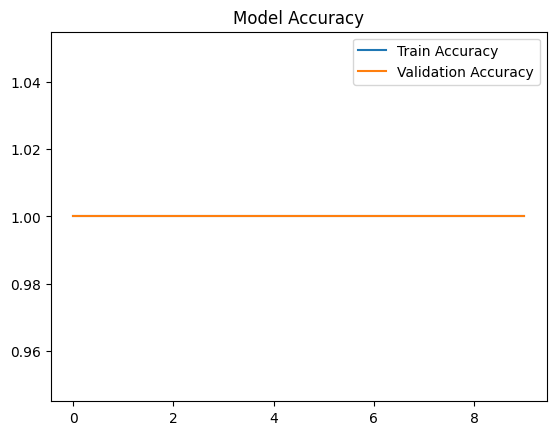

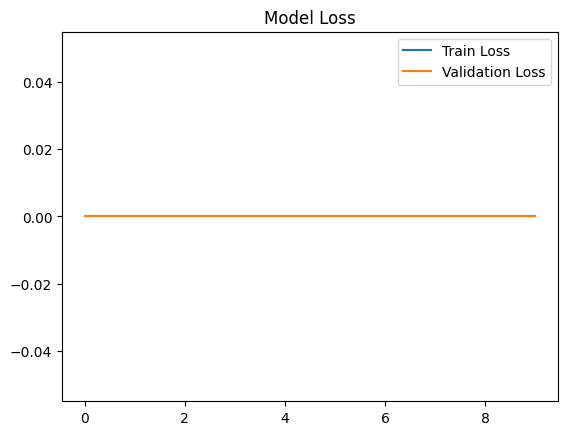

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
img, label = next(val_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (13, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


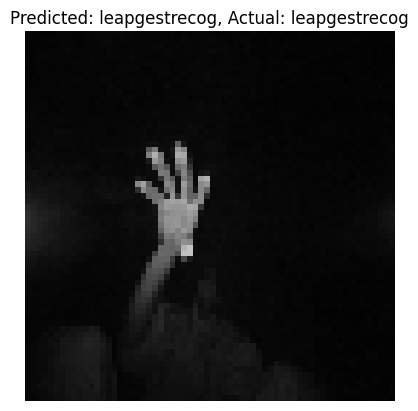

In [ ]:
prediction = model.predict(img)

import matplotlib.pyplot as plt
import numpy as np

plt.imshow(img[0])
plt.title(f"Predicted: {class_labels[np.argmax(prediction[0])]}, Actual: {class_labels[np.argmax(label[0])]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


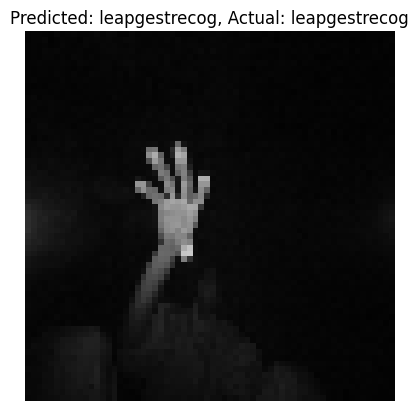

In [ ]:
img, label = next(val_data)
prediction = model.predict(img)

plt.imshow(img[0])
plt.title(f"Predicted: {class_labels[np.argmax(prediction[0])]}, Actual: {class_labels[np.argmax(label[0])]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


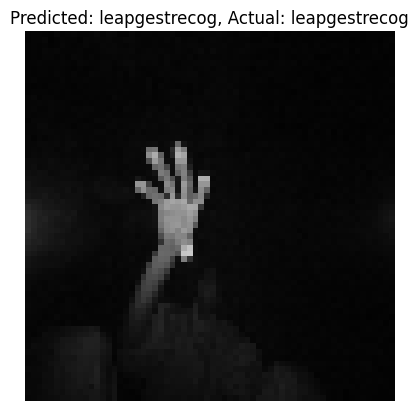

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


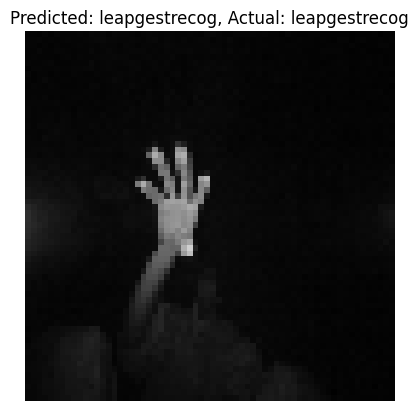

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


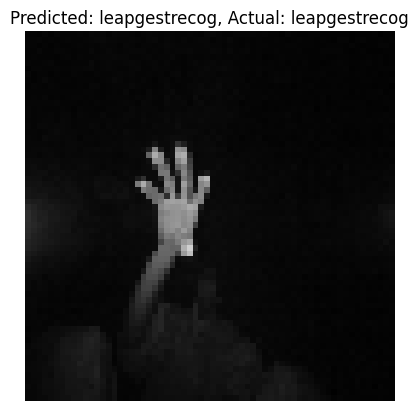

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


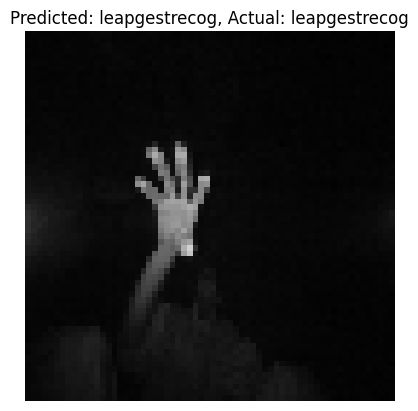

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


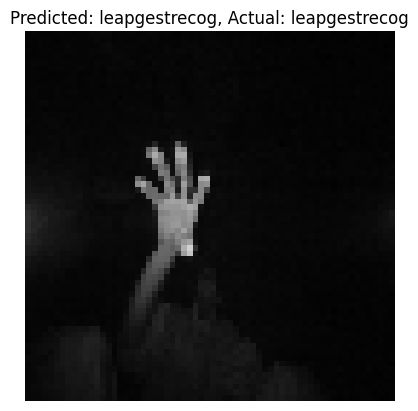

In [ ]:
for i in range(5):  # Show first 5 images
    img, label = next(val_data)
    prediction = model.predict(img)

    plt.imshow(img[0])
    pred_label = class_labels[np.argmax(prediction[0])]
    true_label = class_labels[np.argmax(label[0])]

    plt.title(f"Predicted: {pred_label}, Actual: {true_label}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amer_sign2.png to amer_sign2.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


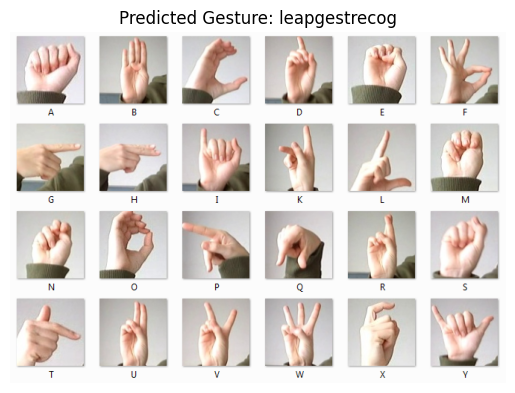

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = next(iter(uploaded))  # Get uploaded image name
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_label = class_labels[np.argmax(pred)]

# Show result
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted Gesture: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

# 1. Fast evaluation on full validation set
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy (model.evaluate): {val_accuracy * 100:.2f}%")

# 2. Manual accuracy on one batch (for illustration)
imgs, labels = next(val_data)
pred_probs = model.predict(imgs)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(labels, axis=1)
batch_accuracy = np.mean(pred_classes == true_classes)
print(f"Batch Accuracy (manual): {batch_accuracy * 100:.2f}%")

# 3. Manual accuracy on full validation set (slower)
all_preds = []
all_trues = []

for i in range(len(val_data)):
    imgs, labels = val_data[i]
    preds = model.predict(imgs)
    all_preds.extend(np.argmax(preds, axis=1))
    all_trues.extend(np.argmax(labels, axis=1))

all_preds = np.array(all_preds)
all_trues = np.array(all_trues)

full_accuracy = np.mean(all_preds == all_trues)
print(f"Full Validation Set Accuracy (manual): {full_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy (model.evaluate): 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Batch Accuracy (manual): 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Full Validation Set Accuracy (manual): 100.00%
